# Chapter 3 - Mixed Strategy Nash Equilibrium

## Short Introduction

In the previous chapter, we explored **Iterated Elimination of Dominated Strategies (IEDS)**. We saw that for some games, IEDS predicts a unique outcome. However, for many games, like **Matching Pennies** or **Rock-Paper-Scissors**, there is no stable outcome in pure strategies.

This chapter focuses on the concept of **Mixed Strategy Nash Equilibrium**, where players randomize their actions to keep their opponents guessing.

### Nash Equilibrium Definition
A strategy profile $s^* = (s_1^*, s_2^*, ..., s_n^*)$ is a **Nash Equilibrium** if no player can unilaterally deviate from their strategy to strictly improve their payoff.

Formally, for every player $i$ and every strategy $s_i \in S_i$:
$$ u_i(s_i^*, s_{-i}^*) \geq u_i(s_i, s_{-i}^*) $$

In a Mixed Strategy equilibrium, $s_i^*$ is a probability distribution.

## 1. Interdisciplinary Application: Political Philosophy

### The Social Contract: John Locke (1690)

In the *Second Treatise of Government*, Locke argues against Absolute Monarchy using a game-theoretical intuition about **Risk** and **Safety**. He contrasts two states:

1.  **State of Nature**: Individuals are at risk from each other (distributed risk, "polecats or foxes").
2.  **Absolute Monarchy**: Subjects are safe from each other but at extreme risk from the Monarch (concentrated risk, "lions").

> "This implies that men are so foolish that they would take care to avoid harms from polecats or foxes, but think it is safety to be eaten by lions."

We can model the formation of a **Civil Society** (Social Contract) as a **Stag Hunt** game. Creating a safe, lawful society requires everyone to cooperate (hunt the Stag). If you try to form a society but others stay in the state of nature (hunt Hare), you fail and waste effort. If everyone sticks to the state of nature, you are safe but poor.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

## 2. The Stag Hunt Game

Consider two individuals deciding whether to Cooperate (Hunt Stag / Form Social Contract) or Defect (Hunt Hare / Stay in State of Nature).

- **Stag (S)**: High payoff (5) if both choose it. 0 if you go alone.
- **Hare (H)**: Safe payoff (3) regardless of what the other does.

### Payoff Matrix

| | Stag ($q$) | Hare ($1-q$) |
|---|---|---|
| **Stag ($p$)** | 5, 5 | 0, 3 |
| **Hare ($1-p$)** | 3, 0 | 3, 3 |

Let $p$ be the probability Player 1 plays **Stag**.
Let $q$ be the probability Player 2 plays **Stag**.

### Pure Strategy Nash Equilibria
If we look at pure strategies:
1.  **Stag, Stag**: Payoffs (5, 5). Neither wants to deviate to Hare (0 < 5). $\rightarrow$ **NE**.
2.  **Hare, Hare**: Payoffs (3, 3). Neither wants to deviate to Stag (0 < 3). $\rightarrow$ **NE**.
3.  **Stag, Hare**: Payoffs (0, 3). P1 wants to switch to Hare (3 > 0).

So we have two pure equilibria: one high-payoff (Social Contract) and one risk-dominant (State of Nature).

### Why Mixed Strategies?
If you are unsure what the other person will do, you might randomize or play a mixed strategy. The **Mixed Strategy Nash Equilibrium** tells us the "Tipping Point" of belief.

## 3. Deriving the Mixed Strategy Equilibrium

For Player 1 to mix between Stag and Hare, they must be **indifferent** between the two options.

**Player 1's Expected Utilities:**
Given Player 2 plays Stag with probability $q$:
$$ EU_1(Stag) = q(5) + (1-q)(0) = 5q $$
$$ EU_1(Hare) = q(3) + (1-q)(3) = 3 $$

**Indifference Condition:**
$$ EU_1(Stag) = EU_1(Hare) $$
$$ 5q = 3 $$
$$ q^* = \frac{3}{5} = 0.6 $$

**Analysis**:
- If Player 1 believes Player 2 is **more than 60% likely** to cooperate ($q > 0.6$), Player 1 should play **Stag**.
- If Player 1 believes Player 2 is **less than 60% likely** to cooperate ($q < 0.6$), Player 1 should play **Hare**.
- At exactly $q = 0.6$, Player 1 is indifferent.

Since the game is symmetric, the same logic applies to Player 2: $p^* = 0.6$.

## 4. Best Response Correspondence

We can plot the Best Response functions ($BR_1$ and $BR_2$) to clearly see the three equilibria.

**Player 1 ($BR_1$ - Red)**:
- Input: $q$ (P2's prob of Stag)
- Output: Best $p$ (P1's choice)
- $q < 0.6 \rightarrow p = 0$ (Hare)
- $q > 0.6 \rightarrow p = 1$ (Stag)
- $q = 0.6 \rightarrow p \in [0, 1]$

**Player 2 ($BR_2$ - Blue)**:
- Input: $p$ (P1's prob of Stag)
- Output: Best $q$ (P2's choice)
- $p < 0.6 \rightarrow q = 0$ (Hare)
- $p > 0.6 \rightarrow q = 1$ (Stag)
- $p = 0.6 \rightarrow q \in [0, 1]$

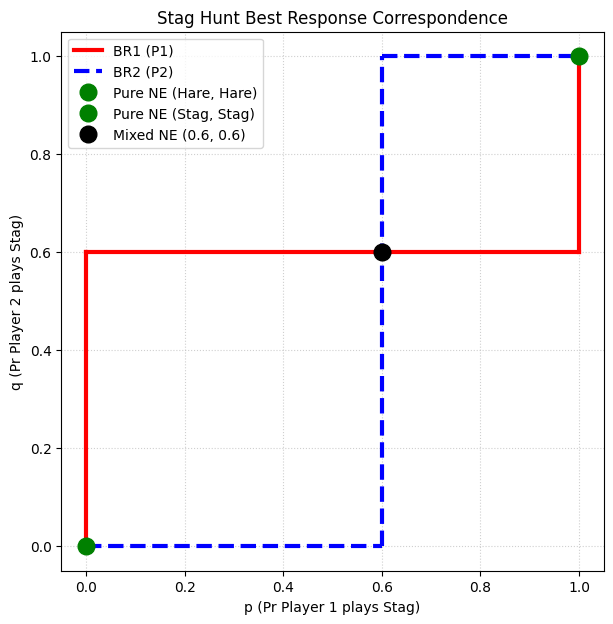

In [24]:
def plot_stag_hunt_br():
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # --- BR1 (Red): Function of q (Y-axis) -> Returns p (X-axis)
    # q < 0.6 -> p=0
    ax.plot([0, 0], [0, 0.6], 'r-', linewidth=3, label='BR1 (P1)')
    # q = 0.6 -> p in [0, 1]
    ax.plot([0, 1], [0.6, 0.6], 'r-', linewidth=3)
    # q > 0.6 -> p=1
    ax.plot([1, 1], [0.6, 1], 'r-', linewidth=3)

    # --- BR2 (Blue): Function of p (X-axis) -> Returns q (Y-axis)
    # p < 0.6 -> q=0
    ax.plot([0, 0.6], [0, 0], 'b--', linewidth=3, label='BR2 (P2)')
    # p = 0.6 -> q in [0, 1]
    ax.plot([0.6, 0.6], [0, 1], 'b--', linewidth=3)
    # p > 0.6 -> q=1
    ax.plot([0.6, 1], [1, 1], 'b--', linewidth=3)
    
    # Equilibria Points
    # 1. Hare-Hare (0, 0)
    ax.plot(0, 0, 'go', markersize=12, label='Pure NE (Hare, Hare)')
    # 2. Stag-Stag (1, 1)
    ax.plot(1, 1, 'go', markersize=12, label='Pure NE (Stag, Stag)')
    # 3. Mixed NE (0.6, 0.6)
    ax.plot(0.6, 0.6, 'ko', markersize=12, label='Mixed NE (0.6, 0.6)')
    
    ax.set_xlabel('p (Pr Player 1 plays Stag)')
    ax.set_ylabel('q (Pr Player 2 plays Stag)')
    ax.set_title('Stag Hunt Best Response Correspondence')
    ax.legend()
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    
    plt.show()

plot_stag_hunt_br()

## 5. Bibliography

*   **Locke, J.** (1690). *Second Treatise of Government*.
*   **Skyrms, B.** (2004). *The Stag Hunt and the Evolution of Social Structure*. Cambridge University Press.
*   **Osborne, M. J.** (2004). *An Introduction to Game Theory*. Oxford University Press.

## Motivating Example: Matching Pennies

Consider a zero-sum game where Player 1 wants to match, and Player 2 wants to mismatch.

| | Heads | Tails |
|---|---|---|
| **Heads** | 1, -1 | -1, 1 |
| **Tails** | -1, 1 | 1, -1 |

If we check for Pure Strategy Nash Equilibria:
*   (H, H) -> P2 deviates to T (-1 -> 1)
*   (H, T) -> P1 deviates to T (-1 -> 1)
*   (T, T) -> P2 deviates to H (-1 -> 1)
*   (T, H) -> P1 deviates to H (-1 -> 1)

There is no pure strategy stability. We need to mix.

## Deriving Mixed Strategies: The Indifference Principle

Let $p$ = Pr(Player 1 plays Heads).
Let $q$ = Pr(Player 2 plays Heads).

For a player to be willing to mix (randomize) between two strategies, they must be **indifferent** between the expected payoffs of those strategies given the other player's mix.

#### Solver for Player 2's Mix ($q$)
Player 1 chooses $p$ to maximize utility. Player 1 is performing the mixing, so we look at Player 1's payoffs to find the indifference point that makes *Player 1* willing to mix.
Wait, usually we say: To find $q$, we use Player 1's indifference. To find $p$, we use Player 2's indifference.

**Player 1's Expected Utilities:**
- If P1 plays **Heads** ($p=1$): $EU_1(H) = q(1) + (1-q)(-1) = 2q - 1$
- If P1 plays **Tails** ($p=0$): $EU_1(T) = q(-1) + (1-q)(1) = 1 - 2q$

For P1 to mix ($0 < p < 1$), we must have $EU_1(H) = EU_1(T)$:
$$ 2q - 1 = 1 - 2q $$
$$ 4q = 2 \implies q^* = 0.5 $$

#### Solver for Player 1's Mix ($p$)
**Player 2's Expected Utilities:**
- If P2 plays **Heads**: $EU_2(H) = p(-1) + (1-p)(1) = 1 - 2p$
- If P2 plays **Tails**: $EU_2(T) = p(1) + (1-p)(-1) = 2p - 1$

For P2 to mix, $EU_2(H) = EU_2(T)$:
$$ 1 - 2p = 2p - 1 $$
$$ 4p = 2 \implies p^* = 0.5 $$

Result: Indifference implies $(p^*=0.5, q^*=0.5)$.

## Best Response Correspondence

We can plot the "Best Response" functions.

**Player 1's Best Response $BR_1(q)$:**
- If $q > 0.5$: P1 prefers Heads ($p=1$).
- If $q < 0.5$: P1 prefers Tails ($p=0$).
- If $q = 0.5$: P1 is indifferent ($p \in [0, 1]$).

**Player 2's Best Response $BR_2(p)$:**
- If $p < 0.5$: P2 prefers Heads ($q=1$).
- If $p > 0.5$: P2 prefers Tails ($q=0$).
- If $p = 0.5$: P2 is indifferent ($q \in [0, 1]$).

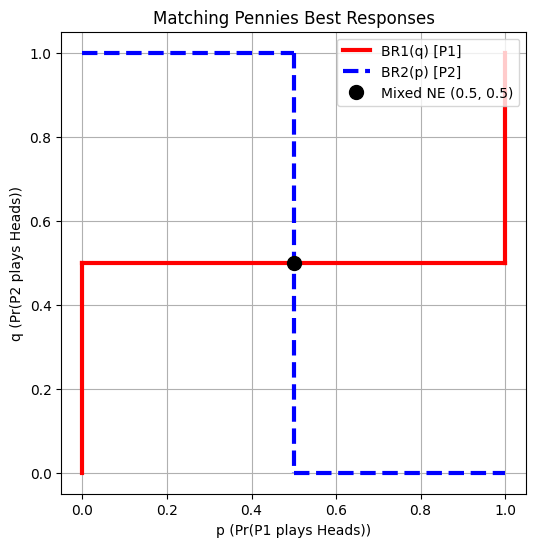

In [26]:
def plot_matching_pennies_br():
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # BR1(q) -> Red Line
    # Recall axes: X=p, Y=q
    # If q < 0.5, p=0.  Line from (0,0) to (0, 0.5)
    # If q = 0.5, p in [0,1]. Line from (0, 0.5) to (1, 0.5)
    # If q > 0.5, p=1.  Line from (1, 0.5) to (1, 1)
    ax.plot([0, 0], [0, 0.5], 'r-', label='BR1(q) [P1]', linewidth=3)
    ax.plot([0, 1], [0.5, 0.5], 'r-', linewidth=3)
    ax.plot([1, 1], [0.5, 1], 'r-', linewidth=3)

    # BR2(p) -> Blue Line
    # If p < 0.5, q=1.  Line from (0, 1) to (0.5, 1)
    # If p = 0.5, q in [0,1]. Line from (0.5, 1) to (0.5, 0)
    # If p > 0.5, q=0.  Line from (0.5, 0) to (1, 0)
    ax.plot([0, 0.5], [1, 1], 'b--', label='BR2(p) [P2]', linewidth=3)
    ax.plot([0.5, 0.5], [1, 0], 'b--', linewidth=3)
    ax.plot([0.5, 1], [0, 0], 'b--', linewidth=3)
    
    # Intersection
    ax.plot(0.5, 0.5, 'ko', markersize=10, label='Mixed NE (0.5, 0.5)')
    
    ax.set_xlabel('p (Pr(P1 plays Heads))')
    ax.set_ylabel('q (Pr(P2 plays Heads))')
    ax.set_title('Matching Pennies Best Responses')
    ax.legend()
    ax.grid(True)
    plt.show()

plot_matching_pennies_br()

#### NOTE THAT MATCHING PENNIES HAS ONLY ONE NE IN MIXED STRATEGIES, AND NO NE IN PURE STRATEGIES


## General Solver for 2x2 Games

We can generalize this to any 2x2 game defined by payoffs:

P1: $\begin{pmatrix} A & B \\ C & D \end{pmatrix}$  ,  P2: $\begin{pmatrix} a & b \\ c & d \end{pmatrix}$

The indifference condition for P1 ($q$):
$$ qA + (1-q)B = qC + (1-q)D $$
$$ q(A - B - C + D) = D - B $$
$$ q^* = \frac{D - B}{A - B - C + D} $$

This formula works if a mixed equilibrium exists.